## Direct Signal

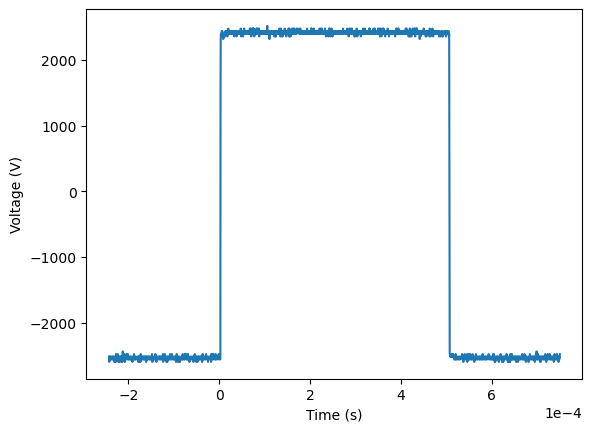

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/ALL0016/step_func.CSV', header=None)
df = pd.DataFrame([df[3], df[4]]).T

plt.plot(df[3], df[4])
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Fourier Transform

Text(0.5, 0, 'Frequency (Hz)')

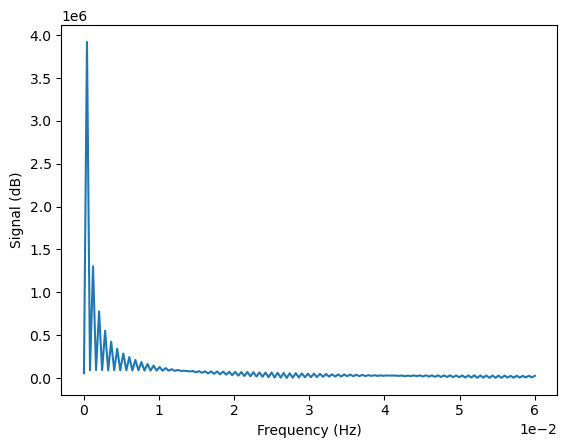

In [2]:
import numpy as np

sp = np.fft.fft(df[4])
freq = np.fft.fftfreq(len(df[3]))

plt.plot(freq[:150], np.abs(sp[:150]))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ylabel('Signal (dB)')
plt.xlabel('Frequency (Hz)')

## Discrete Plancherel Theorem

In [3]:
np.sum(np.abs(df[4])**2)

15268425600.0

In [4]:
(1/len(sp))*np.sum(np.abs(sp)**2)

15268425600.0

## Discrete Uncertainty Principle

In [5]:
# Get number of non-zero entries in signal
nonzero_signal = np.count_nonzero(df[4].values)
# Do the same for the FFT
nonzero_FFT = np.count_nonzero(np.array(sp))

# Check inequality
N = len(df[4])
nonzero_FFT * nonzero_signal

6160324

In [6]:
N

2482

### Convenience Functions
These functions can take the oscilloscope DataFrames and plot/calculate the stuff above.

In [7]:
'''def plot_signal(df):
    plt.plot(df[3], df[4])
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (s)')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

def plot_FFT(df, truncate=150):
    plt.plot(freq[:truncate], np.abs(sp[:truncate]))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ylabel('Signal (dB)')
    plt.xlabel('Frequency (Hz)')'''

def plot_signal(df, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(df[3], df[4])
    ax.set_ylabel('Voltage (V)')
    ax.set_xlabel('Time (s)')
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

def plot_FFT(df, ax=None, truncate=150):
    sp = np.fft.fft(df[4])
    freq = np.fft.fftfreq(len(df[3]))
    if ax is None:
        ax = plt.gca()
    ax.plot(freq[:truncate], np.abs(sp[:truncate]))
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_ylabel('Signal (dB)')
    ax.set_xlabel('Frequency (Hz)')

def summary(df):
    sp = np.fft.fft(df[4])
    nonzero_signal = np.count_nonzero(df[4].values)
    nonzero_FFT = np.count_nonzero(np.array(sp))

    print('np.sum(np.abs(df[4])**2): {}'.format(np.sum(np.abs(df[4])**2)))
    print('(1/len(sp))*np.sum(np.abs(sp)**2): {}'.format((1/len(sp))*np.sum(np.abs(sp)**2)))
    print('nonzero_FFT * nonzero_signal: {}'.format(nonzero_FFT * nonzero_signal))
    print('N: {}'.format(len(df[4])))
    print('Product >= N? -> {}'.format(nonzero_FFT * nonzero_signal >= len(df[4])))

In [8]:
summary(df)

np.sum(np.abs(df[4])**2): 15268425600.0
(1/len(sp))*np.sum(np.abs(sp)**2): 15268425600.0
nonzero_FFT * nonzero_signal: 6160324
N: 2482
Product >= N? -> True


# Streamlined Lab
The cells below streamline the entire lab. Replace the `file_number` with the 4-digit number of the file you want to see. Use the `CH1.CSV` files, not the Fourier Transform (unless you change the code to the inverse transform).

In [14]:
file_number = '0019'
path = f'Data/ALL{file_number}/F{file_number}CH1.CSV'
next_df = pd.read_csv(path, header=None)
next_df = pd.DataFrame([next_df[3], next_df[4]]).T

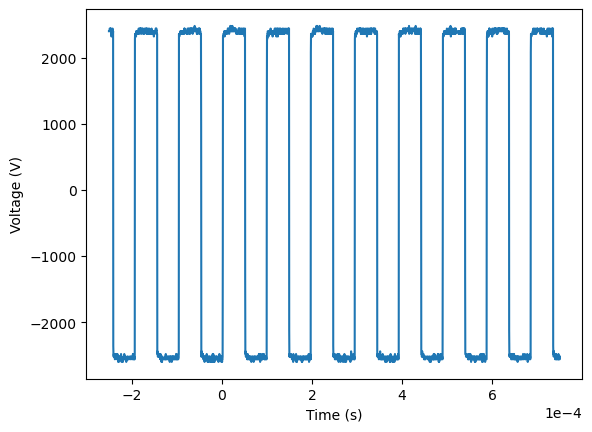

In [15]:
plot_signal(next_df)

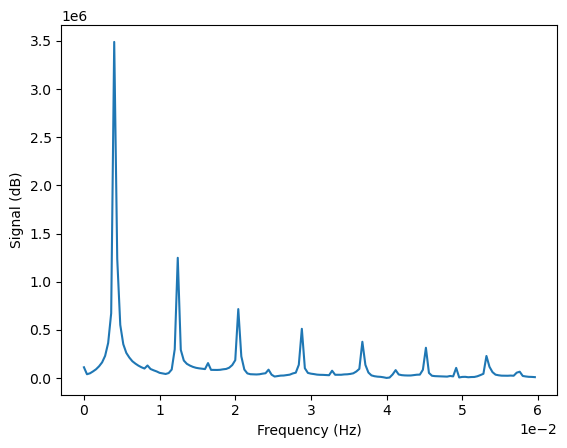

In [16]:
plot_FFT(next_df)

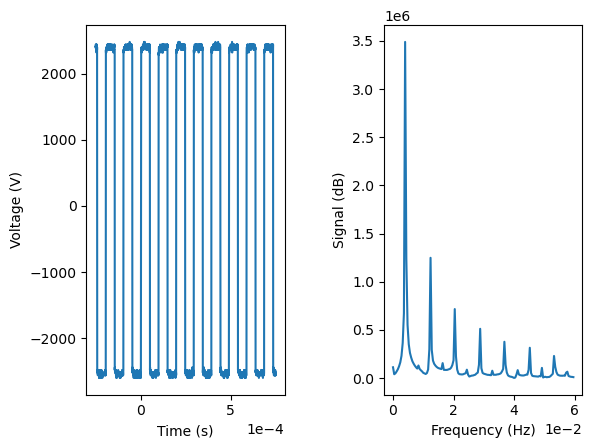

In [17]:
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)

plot_signal(next_df, ax[0])
plot_FFT(next_df, ax[1])

plt.show()

In [18]:
summary(next_df)

np.sum(np.abs(df[4])**2): 15164670400.0
(1/len(sp))*np.sum(np.abs(sp)**2): 15164670399.999998
nonzero_FFT * nonzero_signal: 6250000
N: 2500
Product >= N? -> True
